### Imports

In [38]:
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

### Mounting Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading Model

In [3]:
model_path = '/content/drive/My Drive/Neural Networks/Computer Vision/Cats_and_Dogs_Model_EfficientNet.h5'
new_model = tf.keras.models.load_model(model_path, custom_objects={'KerasLayer': hub.KerasLayer})

### Testing on an Image

In [15]:
url = "https://live.staticflickr.com/5011/5535036973_0a73871542_b.jpg"
img = Image.open(BytesIO(requests.get(url).content))

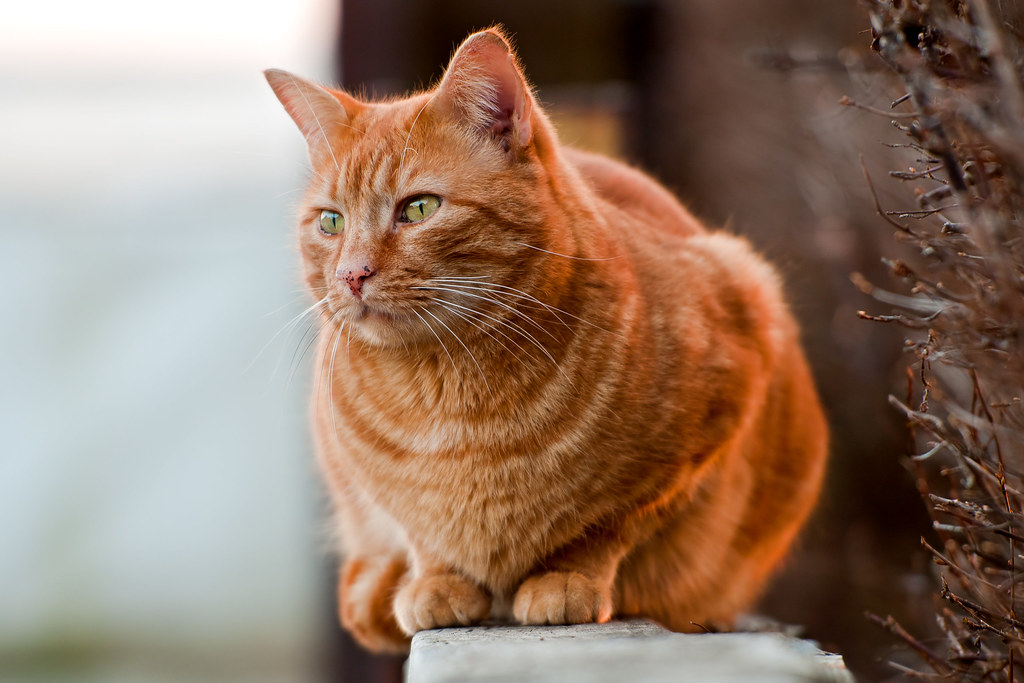

In [16]:
img

In [18]:
resized_img = img.resize((256, 256))

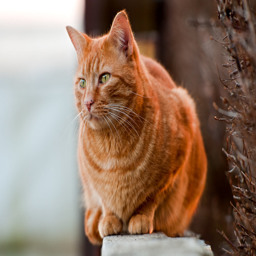

In [19]:
resized_img

In [26]:
resized_img_array = np.asarray(resized_img)
resized_img_array = resized_img_array/255

In [27]:
resized_img_array.shape

(256, 256, 3)

In [28]:
true_label = "cat"
class_names = ['cat', 'dog']
prediction_scores = new_model.predict(np.expand_dims(resized_img_array, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + true_label)
print("Predicted label: " + class_names[predicted_index])

1/1 [==============================] - 6s 6s/step
True label: cat
Predicted label: cat


In [29]:
print(prediction_scores)

[[ 1.3976378 -1.392939 ]]


### Condensing into One Function

In [39]:
def predict_url(url, true_label):
    img = Image.open(BytesIO(requests.get(url).content))
    resized_img = img.resize((256, 256))
    resized_img_array = np.asarray(resized_img)
    resized_img_array = resized_img_array/255
    
    class_names = ['cat', 'dog']
    prediction_scores = new_model.predict(np.expand_dims(resized_img_array, axis=0))
    predicted_index = np.argmax(prediction_scores)

    plt.imshow(resized_img_array)
    plt.axis('off')
    plt.show()
    print("True label: " + true_label)
    print("Predicted label: " + class_names[predicted_index])

1/1 [==============================] - 2s 2s/step


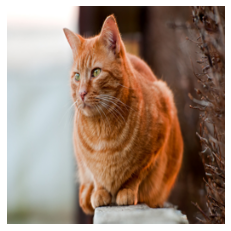

True label: cat
Predicted label: cat


In [40]:
url = "https://live.staticflickr.com/5011/5535036973_0a73871542_b.jpg"
predict_url(url, "cat")

1/1 [==============================] - 2s 2s/step


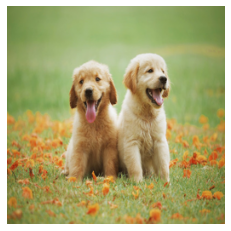

True label: dog
Predicted label: dog


In [41]:
url = "https://img.rawpixel.com/private/static/images/website/2022-05/ns8230-image.jpg?w=800&dpr=1&fit=default&crop=default&q=65&vib=3&con=3&usm=15&bg=F4F4F3&ixlib=js-2.2.1&s=b3961e17298745c0868eeef46211c3d0"
predict_url(url, "dog")

1/1 [==============================] - 2s 2s/step


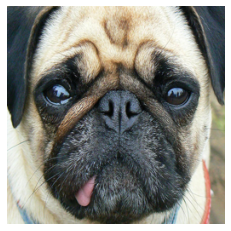

True label: dog
Predicted label: dog


In [42]:
url = "https://live.staticflickr.com/2031/2104850919_7a59cf41a9_b.jpg"
predict_url(url, "dog")